Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3356 - accuracy: 0.1084 - val_loss: 2.0447 - val_accuracy: 0.4823
Epoch 2/100
1/1 [=========================

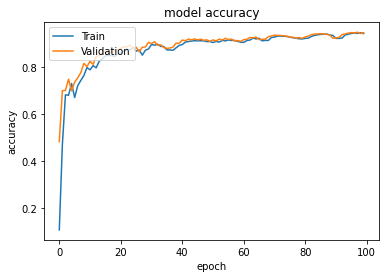

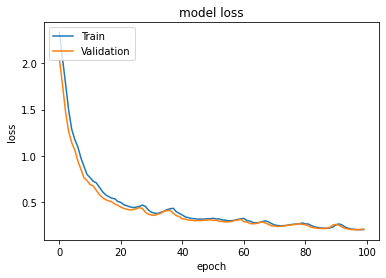

Epoch 1/100
188/188 [==============================] - 1s 8ms/step - loss: 0.1806 - accuracy: 0.9457 - val_loss: 0.1547 - val_accuracy: 0.9544
Epoch 2/100
188/188 [==============================] - 1s 8ms/step - loss: 0.1217 - accuracy: 0.9640 - val_loss: 0.1354 - val_accuracy: 0.9580
Epoch 3/100
188/188 [==============================] - 1s 8ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.1020 - val_accuracy: 0.9688
Epoch 4/100
188/188 [==============================] - 2s 8ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.1115 - val_accuracy: 0.9650
Epoch 5/100
188/188 [==============================] - 2s 8ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 6/100
188/188 [==============================] - 2s 8ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0953 - val_accuracy: 0.9726
Epoch 7/100
188/188 [==============================] - 1s 8ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0923 - val_accuracy: 0.9732

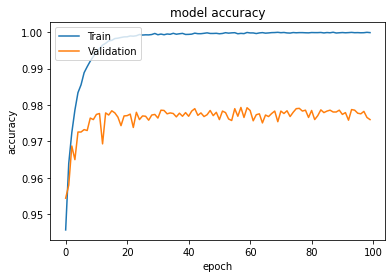

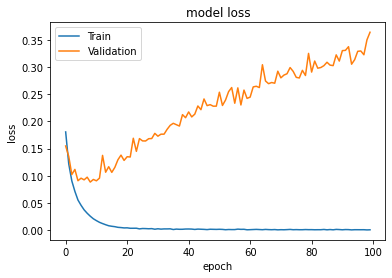

Epoch 1/100
18958/48000 [==========>...................] - ETA: 1:26 - loss: 0.0493 - accuracy: 0.9927

KeyboardInterrupt: ignored

In [7]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import models, layers
import time




#MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
batch_size = [60000, 256, 1]




 # Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.




model = keras.Sequential([
layers.Flatten(input_shape=(num_features, )),
layers.Dense(128, activation='relu'),
layers.Dense(256, activation='relu'),
layers.Dense(num_classes, activation = 'softmax')
])

#from_logits=false infroms us that softmax has been applied to output layer so a propability distribution is produced.

model.compile(loss =keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

model.summary()

for bs in batch_size:

  start = time.time()

  history = model.fit(x_train, y_train ,batch_size=bs, epochs=100, validation_split = 0.2)

  stop = time.time()

  print(f"Time of training for batch_size = {bs} is: {stop - start}")


  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

